# First implementation of Machine Learning Algorithm

In this file, we are going to import data from a file .csv that we take from chornograf.
We have to parse him and put into an array.
Finally we will insert some machin Learning algorithm with the librairy sklearn.

To do this, we will use some librairy as pandas, matplotlib, numpy, sklearn and some others.


Le fichier data2learn2.csv a pour query ceci : 

SELECT mean("moisture-percent") AS "mean_moisture-percent" ,  mean("temperature") AS "mean_temperature"

FROM "demeter"."autogen"."chirp-left" 

WHERE time > now() - 1200h AND time < now() -700h

GROUP BY time(30m)

In [1]:
from sklearn import linear_model
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dans le fichier DataAll.csv

Toutes les données de puis 1300h à partir 7 mars au 30 avril

SELECT mean("temperature") AS "mean_temperature", mean("moisture-percent") AS "mean_moisture-percent" 

FROM "demeter"."autogen"."chirp-left" 

WHERE time > now() - 1300h 

GROUP BY time(30m) FILL(null)

In [2]:
#Data place 
tabl = []

name = 'Data2learn.csv'

nameTabl = []
with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    ligne = 0
    for row in csv_reader:
        if ligne != 0:
            i = 0
            for el in row:
                tabl[i].append(el)
                i += 1
        else:
            for el in row:
                tabl.append([])
                nameTabl.append(el)
                
        ligne += 1
        
#print(tabl)
print(nameTabl)



['date', 'mean_moisture-percent', 'mean_temperature']


# Import des données 

Leccture d'un fichier csv en un fichier dataframe.

Création d'une base dataframe avec comme colonne le temps, l'humidité, la tempérture, l'humidité + 1, la température + 1.

Il faut régler le problème tu dernier temps.

In [2]:
df = pd.read_csv('DataAll.csv')
#print(df)
#print(df.iloc[:,2])

#Création des deux autres colonnes
df['moistureAdd'] = df.index
df['temperatureAdd'] = df.index

# size
dt = 30
nligne = df.shape[0]
nColumn = df.shape[1]
tmp = np.linspace(0,nligne-2,nligne-1,dtype=int)
df.iloc[tmp, 3] = pd.Series(np.append(df.iloc[tmp+1,1].to_numpy()-df.iloc[tmp,1].to_numpy(),0), index=df.index)
df.iloc[tmp, 4] = pd.Series(np.append(df.iloc[tmp+1,2].to_numpy()-df.iloc[tmp,2].to_numpy(),0), index=df.index)

#Ajout de la ligne
df.iloc[nligne-1, 3] = 0
df.iloc[nligne-1, 4] = 0


#df


## Ajout de l'arrosage

L'arrosage est ajouté au temps 10h30.

In [3]:
import datetime

df['Arrosage'] = df.index
df['TAfterArrosage'] = df.index

liste10h30 = np.linspace(22,982,int((982-22)/48)+1)
j = 0
df.iloc[:,5] = 0
for i in range(nligne):
    if i in df.loc[df['moistureAdd'] >= 3].index:
        if pd.to_datetime(df.iloc[i,0]) < datetime.datetime(2019, 3, 28,0,0,0):
            df.iloc[int(i),5] = 10
        elif pd.to_datetime(df.iloc[i,0]) > datetime.datetime(2019, 4, 17,0,0,0):
            df.iloc[int(i),5] = 40
        else:
            df.iloc[int(i),5] = 20
        j = 0
    df.iloc[int(i),6] = j*30
    j = j + 1
    


Ajout du temps après chaque arrosage

In [4]:
i = 40
while(i+48 < nligne):
    if df.iloc[range(i,i+48),:].isnull().values.any():
        df.drop(df.index[range(i,i+48)],axis = 0,inplace = True)
        nligne = df.shape[0]
        print(i)
    else:
        i = i + 48
print(i)
print(nligne)

1192
1192
2200
2200
2392
2409


In [5]:
print(df.isnull().sum())
for i in range(nligne):
    if df.iloc[i,:].isnull().values.any():
        print(df.index[i])
        
    
df.iloc[range(650,720)]

date                     0
mean_moisture-percent    0
mean_temperature         0
moistureAdd              0
temperatureAdd           0
Arrosage                 0
TAfterArrosage           0
dtype: int64


,date,mean_moisture-percent,mean_temperature,moistureAdd,temperatureAdd,Arrosage,TAfterArrosage
650,3/21/2019 5:00:00.000000000 AM,18.526667,25.115000,-8.333333e-02,-0.026667,0,1110
651,3/21/2019 5:30:00.000000000 AM,18.443333,25.088333,3.333333e-02,-0.088333,0,1140
652,3/21/2019 6:00:00.000000000 AM,18.476667,25.000000,-7.105427e-15,-0.068333,0,1170
653,3/21/2019 6:30:00.000000000 AM,18.476667,24.931667,-6.333333e-02,-0.031667,0,1200
654,3/21/2019 7:00:00.000000000 AM,18.413333,24.900000,-2.333333e-02,0.000000,0,1230
655,3/21/2019 7:30:00.000000000 AM,18.390000,24.900000,-1.166667e-01,0.095000,0,1260
656,3/21/2019 8:00:00.000000000 AM,18.273333,24.995000,0.000000e+00,0.005000,0,1290
657,3/21/2019 8:30:00.000000000 AM,18.273333,25.000000,6.333333e-02,-0.068333,0,1320
658,3/21/2019 9:00:00.000000000 AM,18.336667,24.931667,3.433333e-01,-4.516667,0,1350
659,3/21/2019 9:30:00.000000000 AM,18.680000,20.415000,-1.866667e-01,1.273333,0,1380


# Analyse de la dataFrame


## Linear Regression Multiple Variables sans l'information sur le temps sans arrosage



In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['mean_moisture-percent','mean_temperature','Arrosage']],df.moistureAdd)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
reg.coef_

array([-0.01933088, -0.01771174,  0.29193665])

In [8]:
reg.intercept_

0.72750330059879376

In [9]:
reg.predict([[31,25,10]])[0]

2.6048188639932004

## Linear Regression Multiple Variables AVEC l'information sur le temps sans arrosage

In [10]:
reg2 = linear_model.LinearRegression()
reg2.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
reg2.coef_

array([-0.01288121,  0.00235982,  0.3010838 ,  0.00030924])

In [12]:
reg2.intercept_

-0.15257625559961668

In [13]:
reg2.predict([[31,25,10,0]])[0]

2.5179396651393224

# Test de mes résultats

SANS DES DONNÉES POUR VERIFICATIONS. PAS DE DATA TEST.

Le but est de faire une boucle sur une période en utilisant les valeurs obtenus à l'itérations précédentes

Creation de liste de planification de l'arrosage pour le test

In [14]:
TestSize = 20 #Taille du Test

testArrosage = np.zeros(TestSize)
testArrosage[2] = 10  #Position de notre arrosage et valeur
testArrosage

array([  0.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

Création de la liste de plannification de la temperature pour notre test

In [15]:
PosTemperature = np.linspace(980,980+TestSize-1,TestSize)
testTemperature = (df.iloc[PosTemperature, 2]).values
testTemperature

array([ 26.03333333,  25.89      ,  25.80166667,  25.8       ,
        25.79333333,  25.70333333,  25.7       ,  25.69833333,
        25.61333333,  25.6       ,  25.635     ,  25.715     ,
        25.72333333,  20.065     ,  22.34333333,  24.56166667,
        25.635     ,  26.05      ,  24.62333333,  25.58666667])

Mise en place du test sur le nombre d'itération souhaité

In [16]:
StartHumidity = 10
result = np.zeros(TestSize)
for i in range(0,TestSize):
    result[i] = StartHumidity + reg.predict([[StartHumidity,testTemperature[i],testArrosage[i]]])[0]
    StartHumidity = result[i]

result

array([ 10.07309886,  10.14732333,  13.14104398,  13.15755641,
        13.17386773,  13.19145779,  13.20876686,  13.22577085,
        13.24395163,  13.26201712,  13.27911348,  13.29446241,
        13.30936704,  13.42420246,  13.49646477,  13.52803965,
        13.53999355,  13.54436601,  13.57392269,  13.5858457 ])



## Test avec data Test

Création d'une data frame pour effectuer les tests.

Voici la query effectuer pour obtenir les données.

SELECT mean("moisture-percent") AS "mean_moisture-percent" ,  mean("temperature") AS "mean_temperature"

FROM "demeter"."autogen"."chirp-left" 

WHERE time > now() - 700h AND time < now() -400h

GROUP BY time(30m)

In [17]:
dfTest = pd.read_csv('DataTest.csv')

dfTest['moistureAdd'] = dfTest.index
dfTest['temperatureAdd'] = dfTest.index


# size
nligneTest = dfTest.shape[0]
nColumnTest = dfTest.shape[1]
tmp = np.linspace(0,nligneTest-2,nligneTest-1,dtype=int)
dfTest.iloc[tmp, 3] = pd.Series(np.append(dfTest.iloc[tmp+1,1].to_numpy()-dfTest.iloc[tmp,1].to_numpy(),0), index=dfTest.index)
dfTest.iloc[tmp, 4] = pd.Series(np.append(dfTest.iloc[tmp+1,2].to_numpy()-dfTest.iloc[tmp,2].to_numpy(),0), index=dfTest.index)

#Ajout de la ligne
dfTest.iloc[nligneTest-1, 3] = 0
print(nligneTest)

601


In [18]:
dfTest['Arrosage'] = dfTest.index
liste11h30 = np.linspace(31,559,int((559-31)/48)+1)

dfTest.iloc[:,5] = 0
for i in liste11h30:
    dfTest.iloc[int(i),5] = 20



In [19]:
dfTest['TAfterArrosage'] = dfTest.index

dfTest.iloc[:,6] = 0
for i in np.append(-17,liste11h30):
    for j in range(0,48):
        if i+j < nligneTest:
            dfTest.iloc[int(i+j),6] = j*30


# Delete NaN element

In [20]:
i = 31
while(i+48 < nligneTest-31):
    if dfTest.iloc[range(i,i+48),:].isnull().values.any():
        dfTest.drop(dfTest.index[range(i,i+48)],axis = 0,inplace = True)
        nligneTest = dfTest.shape[0]
        print(i)
    else:
        i = i + 48
dfTest.drop(dfTest.index[range(0,31)],axis = 0,inplace = True)
nligneTest = dfTest.shape[0]

127


## Test avec les donnes SANS le temps

In [21]:
init = 0+48*0
dfTest['resultSansT'] = dfTest.index

StartHumidity = dfTest.iloc[init,1]
TestSize = nligneTest
result = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),7] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result[i] = StartHumidity + reg.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5]]])[0]
    StartHumidity = result[i]
    

#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrSansTemps = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,7].values)
print("Moyenne d'erreur : ",ErrSansTemps)



Moyenne d'erreur :  -2.12514787017


## Test avec les donnes AVEC le temps

In [23]:
init = 0+48*0
dfTest['resultAvecT'] = dfTest.index

StartHumidity = dfTest.iloc[init,1]

TestSize = nligneTest
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),8] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg2.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5],dfTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

#print(result2)
#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrTemps = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,8].values)
print("Moyenne d'erreur : ",ErrTemps)


Moyenne d'erreur :  -0.790327058767


In [24]:
dfTest.iloc[48]

date                     4/1/2019 11:30:00.000000000 AM
mean_moisture-percent                             13.66
mean_temperature                                 26.435
moistureAdd                                     8.86167
temperatureAdd                                    -2.12
Arrosage                                             20
TAfterArrosage                                        0
resultSansT                                     15.0508
resultAvecT                                     15.9343
Name: 79, dtype: object

# Partage de la Data frame

Partage de la data frame en deux. 

Une partie qui contient que les moments où on arrose. On peut selectionner ceci grace à loc et à df['TAfterArrosage'] == 0. Quand on arrose, le temps après arrosage est de 0.

L'autre partie contient les moments où on n'arrose pas. C'est-à-dire les momments où l'eau s'évapore.

In [25]:
dfArrosage = df.loc[df['TAfterArrosage'] == 0]
dfEvaporation = df.loc[df['TAfterArrosage'] > 0]


In [26]:
regLinearAro = linear_model.LinearRegression()
regLinearAro.fit(dfArrosage[['mean_moisture-percent','mean_temperature','Arrosage']],dfArrosage.moistureAdd)

regLinearAro.intercept_
regLinearAro.coef_

array([  3.56053210e-04,  -5.21122953e-01,   6.74187806e-02])

In [27]:
# Pour faire le régression linear sur le moment d'arrosage

regLinearEva = linear_model.LinearRegression()
regLinearEva.fit(dfEvaporation[['mean_moisture-percent','mean_temperature','TAfterArrosage']],dfEvaporation.moistureAdd)

regLinearEva.intercept_
regLinearEva.coef_

array([-0.00911625,  0.02408432,  0.00055585])

In [28]:
#Pour tester sur la base de données de training
init = 23+48*5
base = df 

In [29]:
#Pour tester sur la base de données de training
init = 0
base = dfTest 

In [30]:
dfTest['resultSepare'] = dfTest.index
StartHumidity = base.iloc[init,1]

TestSize = nligneTest
ErrAro = 0
result = np.zeros(TestSize)
ErrEva = 0
nAro = 0

for i in range(0,TestSize):
    dfTest.iloc[int(i+init),9] = StartHumidity

    if i%48 == 0:
        nAro =+ 1
        StartHumidity = dfTest.iloc[init+i,1]
        result[i] = StartHumidity + regLinearAro.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,5]]])[0]
        ErrAro =+ dfTest.iloc[int(i),9] - base.iloc[i,1]
    else: 
        result[i] = StartHumidity + regLinearEva.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6]]])[0]
        ErrEva =+ dfTest.iloc[int(i),9] - base.iloc[i,1]

    StartHumidity = result[i]


ErrAro = ErrAro/nAro
ErrEva = ErrEva/(TestSize-nAro)

print("Moyenne Erreur d'Arrosage : ", ErrAro)
print("Moyenne d'erreur evaporation : ", ErrEva)
ErrSepare = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,9].values)
print("Moyenne d'erreur : ",ErrSepare)

Moyenne Erreur d'Arrosage :  1.97106241738
Moyenne d'erreur evaporation :  -0.00316049118357
Moyenne d'erreur :  -0.313414055919


# Affichage des résultats

On Affiche les resultats

In [31]:
print("Sans le temps : ", ErrSansTemps)
print("Avec le temps : ", ErrTemps)

print("\nDurant Arrosage : ",ErrAro)
print("Evaporation : " , ErrEva)
print("Separe : ", ErrSepare)


Sans le temps :  -2.12514787017
Avec le temps :  -0.790327058767

Durant Arrosage :  1.97106241738
Evaporation :  -0.00316049118357
Separe :  -0.313414055919


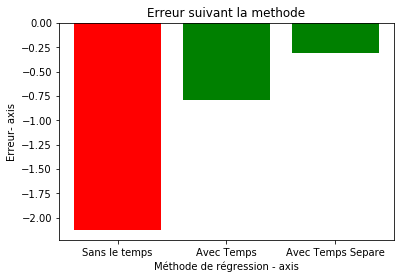

In [32]:
# x-coordinates of left sides of bars  
left = [1, 2, 3] 
  
# heights of bars 
height = [ErrSansTemps, ErrTemps, ErrSepare] 
  
# labels for bars 
tick_label = ['Sans le temps', 'Avec Temps', 'Avec Temps Separe'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','green']) 
  
# naming the x-axis 
plt.xlabel('Méthode de régression - axis') 
# naming the y-axis 
plt.ylabel('Erreur- axis') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

# Graphic

Creation des graphics de la courbe d'évolution de la température



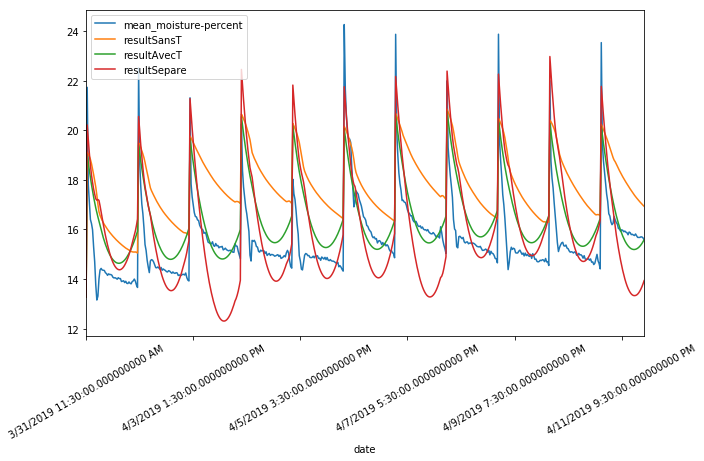

In [95]:
dfTest.plot(x='date', y=['mean_moisture-percent','resultSansT','resultAvecT','resultSepare'],figsize=(10, 6),rot=30)


In [74]:
reg2 = linear_model.Lasso(alpha=2)
reg2.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)
reg2.coef_
reg2.intercept_
reg2.predict([[31,25,10,0]])[0]

1.1811147369860659

In [75]:
init = 0+48*0
dfTest['resultAutre'] = dfTest.index

StartHumidity = dfTest.iloc[init,1]

TestSize = nligneTest
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),10] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg2.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5],dfTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

#print(result2)
#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrAutre = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,10].values)
print("Moyenne d'erreur : ",ErrAutre)

Moyenne d'erreur :  0.266740110109


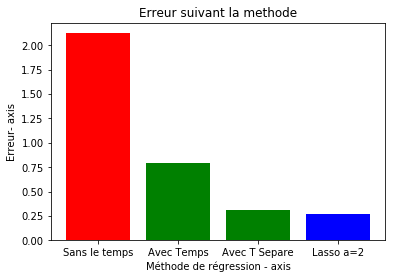

In [82]:
# x-coordinates of left sides of bars  
left = [1, 2, 3,4] 
  
# heights of bars 
height = [ErrSansTemps, ErrTemps, ErrSepare,ErrAutre]
height = [abs(x) for x in height]
  
# labels for bars 
tick_label = ['Sans le temps', 'Avec Temps', 'Avec T Separe','Lasso a=2'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','green','blue']) 
  
# naming the x-axis 
plt.xlabel('Méthode de régression - axis') 
# naming the y-axis 
plt.ylabel('Erreur- axis') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

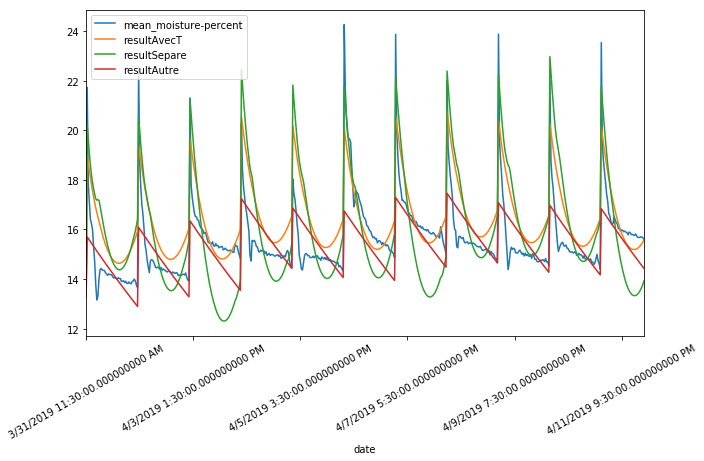

In [94]:
from pylab import *
figure(figsize=(10,6), dpi=80)
dfTest.plot(x='date', y=['mean_moisture-percent','resultAvecT','resultSepare','resultAutre'],figsize=(10, 6),rot=30)
